<h1 align='center'>Logistic regression to predict Telecom Customer Churn</h1>


**Data Dictionary**
- **CustomerID** -> 	The unique ID of each customer
- **Gender** -> 	The gender of a person
- **SeniorCitizen** ->	Whether a customer can be classified as a senior citizen.
- **Partner** -> 	If a customer is married/ in a live-in relationship.
- **Dependents** ->	If a customer has dependents (children/ retired parents)
- **Tenure** ->	The time for which a customer has been using the service.
- **PhoneService** ->  	Whether a customer has a landline phone service along with the internet service.
- **MultipleLines** ->	Whether a customer has multiple lines of internet connectivity.
- **InternetService** -> 	The type of internet services chosen by the customer.
- **OnlineSecurity** -> 	Specifies if a customer has online security.
- **OnlineBackup** -> 	Specifies if a customer has online backup.
- **DeviceProtection** -> 	Specifies if a customer has opted for device protection.
- **TechSupport** -> 	Whether a customer has opted for tech support of not.
- **StreamingTV** ->	Whether a customer has an option of TV streaming.
- **StreamingMovies** -> 	Whether a customer has an option of Movie streaming.
- **Contract** ->  	The type of contract a customer has chosen.
- **PaperlessBilling** ->  	Whether a customer has opted for paperless billing.
- **PaymentMethod** -> 	Specifies the method by which bills are paid.
- **MonthlyCharges** -> 	Specifies the money paid by a customer each month.
- **TotalCharges** -> 	The total money paid by the customer to the company.
- **Churn** ->  	This is the target variable which specifies if a customer has churned or not.
___

>**Author**: SIMANTA NIGAM NAYAK
___

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', 100)

In [3]:
churn_data = pd.read_csv('churn_data.csv')
churn_data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
cus_data = pd.read_csv('customer_data.csv')
cus_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [5]:
int_data = pd.read_csv('internet_data.csv')
int_data.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


In [6]:
#lets merge the datasets into single dataframe joining by customerID

df_1 = pd.merge(churn_data,cus_data,how='inner',on='customerID')
telecom = pd.merge(df_1,int_data,how='inner',on='customerID')
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,0,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,0,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,0,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,0,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,0,No,No,No,Fiber optic,No,No,No,No,No,No


In [7]:
telecom.shape

(7043, 21)

In [8]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


In [9]:
telecom.describe(include='all')

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
count,7043,7043.000000,7043,7043,7043,7043,7043.000000,7043,7043,7043,7043.000000,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,NaN,2,3,2,4,NaN,6531,2,2,NaN,2,2,3,3,3,3,3,3,3,3
top,4879-GZLFH,NaN,Yes,Month-to-month,Yes,Electronic check,NaN,,No,Male,NaN,No,No,No,Fiber optic,No,No,No,No,No,No
freq,1,NaN,6361,3875,4171,2365,NaN,11,5174,3555,NaN,3641,4933,3390,3096,3498,3088,3095,3473,2810,2785
mean,NaN,32.371149,NaN,NaN,NaN,NaN,64.761692,NaN,NaN,NaN,0.162147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,24.559481,NaN,NaN,NaN,NaN,30.090047,NaN,NaN,NaN,0.368612,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,0.000000,NaN,NaN,NaN,NaN,18.250000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,9.000000,NaN,NaN,NaN,NaN,35.500000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,29.000000,NaN,NaN,NaN,NaN,70.350000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,55.000000,NaN,NaN,NaN,NaN,89.850000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- in the dataset we notice that most of the features are of object datatype
- lets convert all the yes and no to 1 & 0 respectively
- PhoneService,PaperlessBilling,Churn,Partner,Dependents seem to have only Yes and No unique values 
- other categorical columns like 'Contract','PaymentMethod','gender','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies' have more than 2 unique variables,and hece we will create dummy variables for them(one hot encoding)

In [10]:
YN_cols = ['PhoneService','PaperlessBilling','Churn','Partner','Dependents']

In [11]:
def binary_mapper(x):
    return x.map({'Yes': 1, 'No': 0})

telecom[YN_cols] = telecom[YN_cols].apply(binary_mapper)

In [12]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,0,1,0,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,0,0,0,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,0,0,0,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,0,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,0,0,0,No,Fiber optic,No,No,No,No,No,No


In [13]:
telecom.describe(include='all')

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
count,7043,7043.000000,7043.000000,7043,7043.000000,7043,7043.000000,7043,7043.000000,7043,7043.000000,7043.000000,7043.000000,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,NaN,NaN,3,NaN,4,NaN,6531,NaN,2,NaN,NaN,NaN,3,3,3,3,3,3,3,3
top,4879-GZLFH,NaN,NaN,Month-to-month,NaN,Electronic check,NaN,,NaN,Male,NaN,NaN,NaN,No,Fiber optic,No,No,No,No,No,No
freq,1,NaN,NaN,3875,NaN,2365,NaN,11,NaN,3555,NaN,NaN,NaN,3390,3096,3498,3088,3095,3473,2810,2785
mean,NaN,32.371149,0.903166,NaN,0.592219,NaN,64.761692,NaN,0.265370,NaN,0.162147,0.483033,0.299588,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,24.559481,0.295752,NaN,0.491457,NaN,30.090047,NaN,0.441561,NaN,0.368612,0.499748,0.458110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,0.000000,0.000000,NaN,0.000000,NaN,18.250000,NaN,0.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,9.000000,1.000000,NaN,0.000000,NaN,35.500000,NaN,0.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,29.000000,1.000000,NaN,1.000000,NaN,70.350000,NaN,0.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,55.000000,1.000000,NaN,1.000000,NaN,89.850000,NaN,1.000000,NaN,0.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
#creating dummy variable and dropping the first column in each cartegory
dummy_cols = ['Contract','PaymentMethod','gender','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
dummy_df = pd.get_dummies(telecom[dummy_cols],drop_first=True)

In [15]:
dummy_df

,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
4,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,0,0,1,1,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1
7039,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,1
7040,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
7041,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [16]:
#lets concat it with the main dataframe

telecom = pd.concat([telecom,dummy_df],axis=1)
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,0,0,0,No,DSL,Yes,No,Yes,No,No,No,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,0,0,0,No,DSL,Yes,Yes,No,No,No,No,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,0,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,0,0,0,No,Fiber optic,No,No,No,No,No,No,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [17]:
#we can now drop the columns undergone one hot encoding
telecom.drop(dummy_cols,axis=1,inplace=True)
telecom.head()

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
0,7590-VHVEG,1,0,1,29.85,29.85,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,5575-GNVDE,34,1,0,56.95,1889.5,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
2,3668-QPYBK,2,1,1,53.85,108.15,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
3,7795-CFOCW,45,0,0,42.30,1840.75,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
4,9237-HQITU,2,1,1,70.70,151.65,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [18]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   tenure                                 7043 non-null   int64  
 2   PhoneService                           7043 non-null   int64  
 3   PaperlessBilling                       7043 non-null   int64  
 4   MonthlyCharges                         7043 non-null   float64
 5   TotalCharges                           7043 non-null   object 
 6   Churn                                  7043 non-null   int64  
 7   SeniorCitizen                          7043 non-null   int64  
 8   Partner                                7043 non-null   int64  
 9   Dependents                             7043 non-null   int64  
 10  Contract_One year                      7043 non-null   uint8  
 11  Cont

In [19]:
#The varaible was imported as a string we need to convert it to float
telecom['TotalCharges'] = pd.to_numeric(telecom['TotalCharges'],errors='coerce')

In [20]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   tenure                                 7043 non-null   int64  
 2   PhoneService                           7043 non-null   int64  
 3   PaperlessBilling                       7043 non-null   int64  
 4   MonthlyCharges                         7043 non-null   float64
 5   TotalCharges                           7032 non-null   float64
 6   Churn                                  7043 non-null   int64  
 7   SeniorCitizen                          7043 non-null   int64  
 8   Partner                                7043 non-null   int64  
 9   Dependents                             7043 non-null   int64  
 10  Contract_One year                      7043 non-null   uint8  
 11  Cont

**All the features and lable is now converted to numeric,the customerID is object which will be dropped before model creation**

**lets check for outliers in data**

In [21]:
telecom.describe(percentiles=[.25,.5,.75,.9,.95,.99])

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
count,7043.000000,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,32.371149,0.903166,0.592219,64.761692,2283.300441,0.265370,0.162147,0.483033,0.299588,0.209144,0.240664,0.216101,0.335794,0.228880,0.504756,0.096834,0.421837,0.439585,0.216669,0.216669,0.286668,0.216669,0.344881,0.216669,0.343888,0.216669,0.290217,0.216669,0.384353,0.216669,0.387903
std,24.559481,0.295752,0.491457,30.090047,2266.771362,0.441561,0.368612,0.499748,0.458110,0.406726,0.427517,0.411613,0.472301,0.420141,0.500013,0.295752,0.493888,0.496372,0.412004,0.412004,0.452237,0.412004,0.475363,0.412004,0.475038,0.412004,0.453895,0.412004,0.486477,0.412004,0.487307
min,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,1.000000,0.000000,35.500000,401.450000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,29.000000,1.000000,1.000000,70.350000,1397.475000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,1.000000,1.000000,89.850000,3794.737500,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
90%,69.000000,1.000000,1.000000,102.600000,5976.640000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
95%,72.000000,1.000000,1.000000,107.400000,6923.590000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
99%,72.000000,1.000000,1.000000,114.729000,8039.883000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


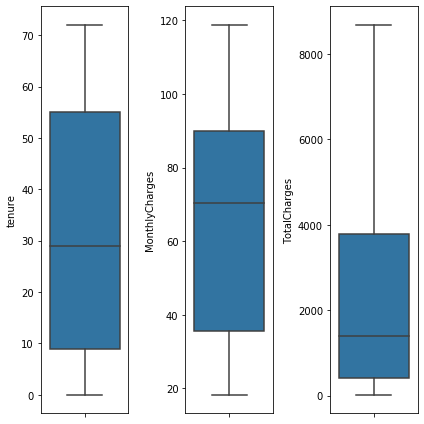

In [22]:
fig,axes = plt.subplots(1,3,figsize=(6,6))
sns.boxplot(y=telecom['tenure'],ax=axes[0])
sns.boxplot(y=telecom['MonthlyCharges'],ax=axes[1])
sns.boxplot(y=telecom['TotalCharges'],ax=axes[2])
plt.tight_layout()

We can see above that there are no outliers in our dataset

**lets check for null values in dataset**

In [23]:
telecom.isnull().sum()

customerID                                0
tenure                                    0
PhoneService                              0
PaperlessBilling                          0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
SeniorCitizen                             0
Partner                                   0
Dependents                                0
Contract_One year                         0
Contract_Two year                         0
PaymentMethod_Credit card (automatic)     0
PaymentMethod_Electronic check            0
PaymentMethod_Mailed check                0
gender_Male                               0
MultipleLines_No phone service            0
MultipleLines_Yes                         0
InternetService_Fiber optic               0
InternetService_No                        0
OnlineSecurity_No internet service        0
OnlineSecurity_Yes                        0
OnlineBackup_No internet service

There are 11 null values in TotalCharges,which is a very small number compared to total size of data.Hence we can remove these values

In [24]:
print('{} % of values are null in TotalCharges'.format(round(telecom['TotalCharges'].isnull().sum()/len(telecom.index) * 100,2)))

0.16 % of values are null in TotalCharges


In [25]:
#droping the null values from dataset

telecom = telecom[~np.isnan(telecom['TotalCharges'])]

In [26]:
telecom.isnull().values.sum()

0

No more null values in dataset
___
The data is now ready for model building process

## Train-test split of data

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X = telecom.drop(['customerID','Churn'],axis=1)
y = telecom['Churn']

In [29]:
X.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
0,1,0,1,29.85,29.85,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,34,1,0,56.95,1889.50,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
2,2,1,1,53.85,108.15,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
3,45,0,0,42.30,1840.75,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
4,2,1,1,70.70,151.65,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [30]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [31]:
#splitting

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)

## Lets scale the features

note: **StandardScaler = (x - mean) / std**

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
scaler = StandardScaler()

we will scale the following columns : tenure,MonthlyCharges,TotalCharges

In [34]:
X_train.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
1584,65,0,1,53.50,3517.90,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1
1043,32,1,1,69.75,2347.90,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1077,41,1,1,114.50,4527.45,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1
2478,4,1,0,44.55,220.75,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6908,9,1,0,55.35,449.75,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [35]:
#for train data we scale with fit_transform but for test data we only use transform

In [36]:
X_train[['tenure','MonthlyCharges','TotalCharges']] = scaler.fit_transform(X_train[['tenure','MonthlyCharges','TotalCharges']])

X_train.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
1584,1.330585,0,1,-0.383857,0.534804,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1
1043,-0.013956,1,1,0.155250,0.022199,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1077,0.352737,1,1,1.639866,0.977112,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1
2478,-1.154780,1,0,-0.680780,-0.909757,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6908,-0.951061,1,0,-0.322482,-0.809427,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


## Now lets check correlation between features

we can drop correlated dummy features this way

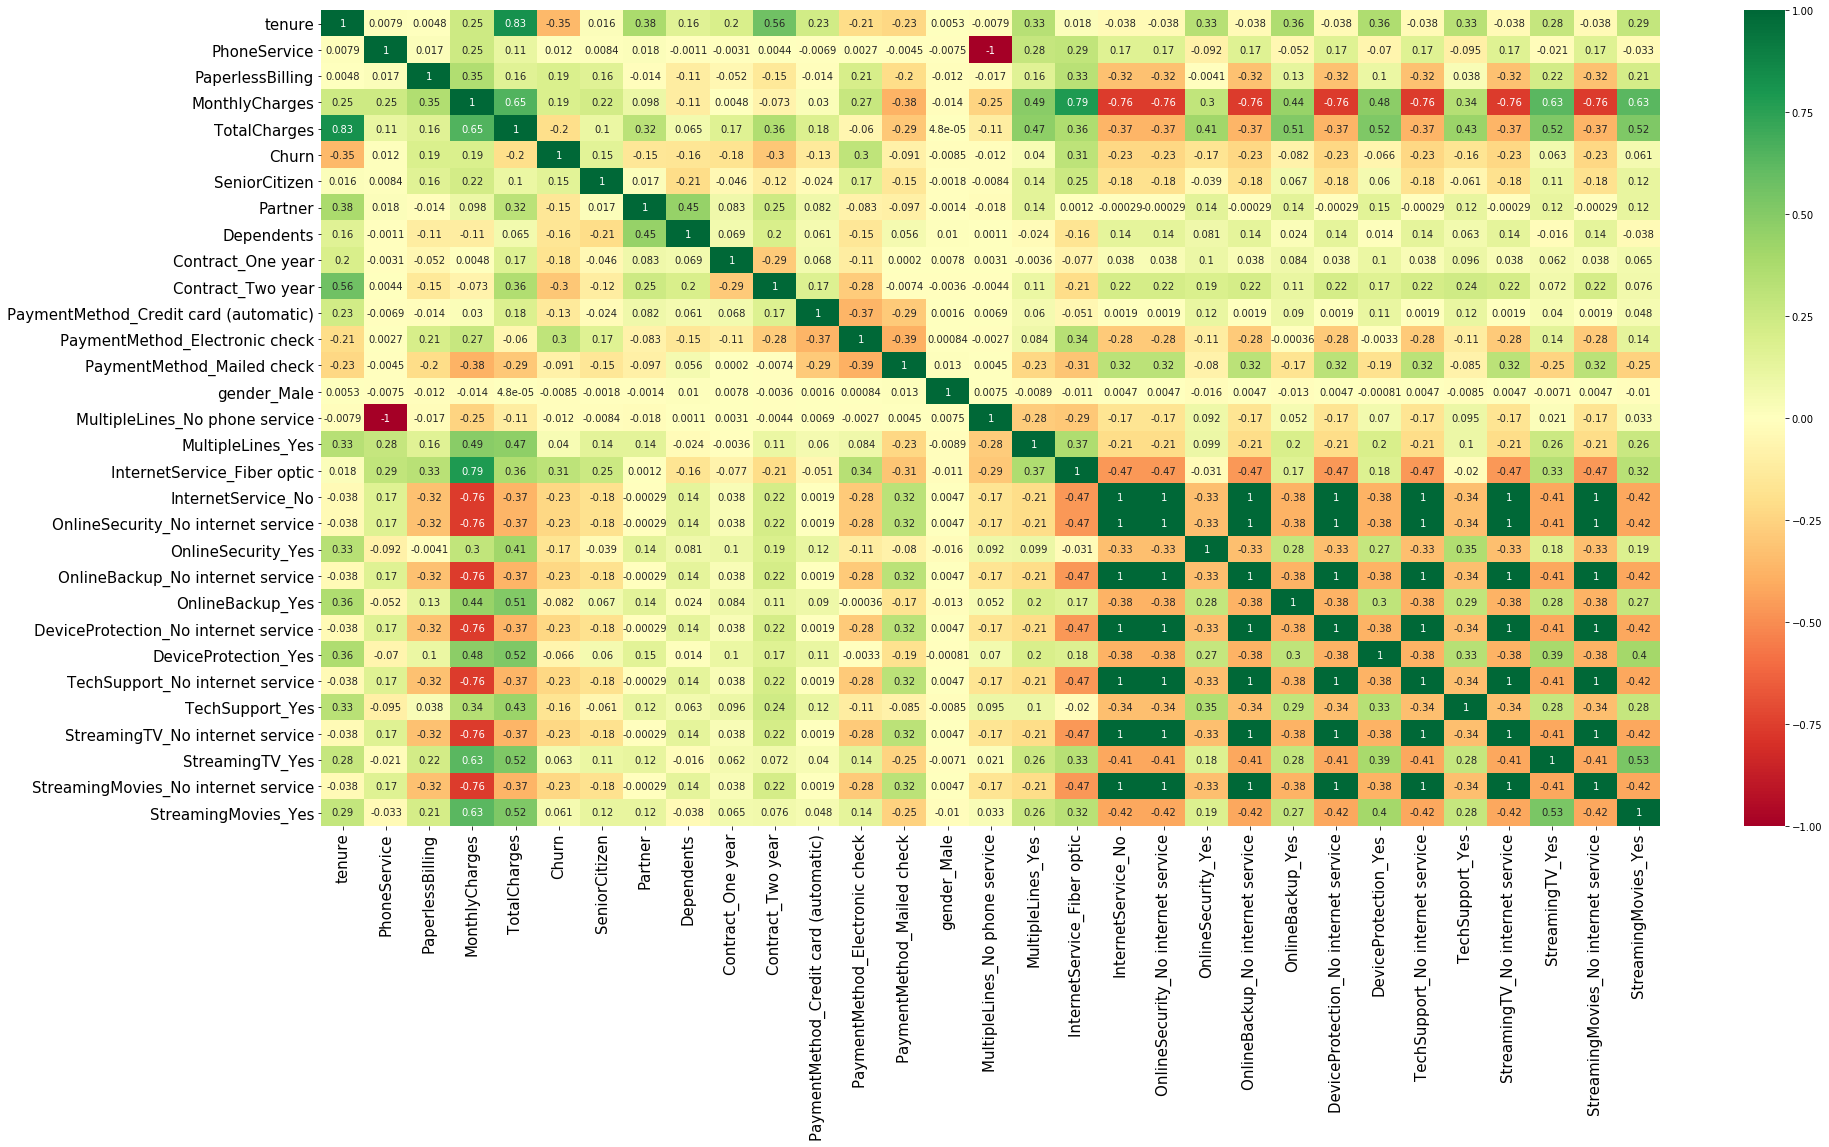

In [37]:
plt.figure(figsize=(30,15))
sns.heatmap(telecom.corr(),annot=True,cmap='RdYlGn')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

**InternetService_No,OnlineSecurity_No internet service,OnlineBackup_No internet service,
DeviceProtection_No internet service,TechSupport_No internet service,
StreamingTV_No internet service,StreamingMovies_No internet service**
have high co-relation between other dummy variables and hence can be dropped from model building

In [38]:
X_train.drop(['InternetService_No','OnlineSecurity_No internet service','OnlineBackup_No internet service', 
              'DeviceProtection_No internet service','TechSupport_No internet service', 
              'StreamingTV_No internet service','StreamingMovies_No internet service'],axis=1,inplace=True)

X_test.drop(['InternetService_No','OnlineSecurity_No internet service','OnlineBackup_No internet service', 
              'DeviceProtection_No internet service','TechSupport_No internet service', 
              'StreamingTV_No internet service','StreamingMovies_No internet service'],axis=1,inplace=True)

In [39]:
X_train.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes
1584,1.330585,0,1,-0.383857,0.534804,1,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,1,1
1043,-0.013956,1,1,0.155250,0.022199,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
1077,0.352737,1,1,1.639866,0.977112,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1
2478,-1.154780,1,0,-0.680780,-0.909757,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
6908,-0.951061,1,0,-0.322482,-0.809427,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0


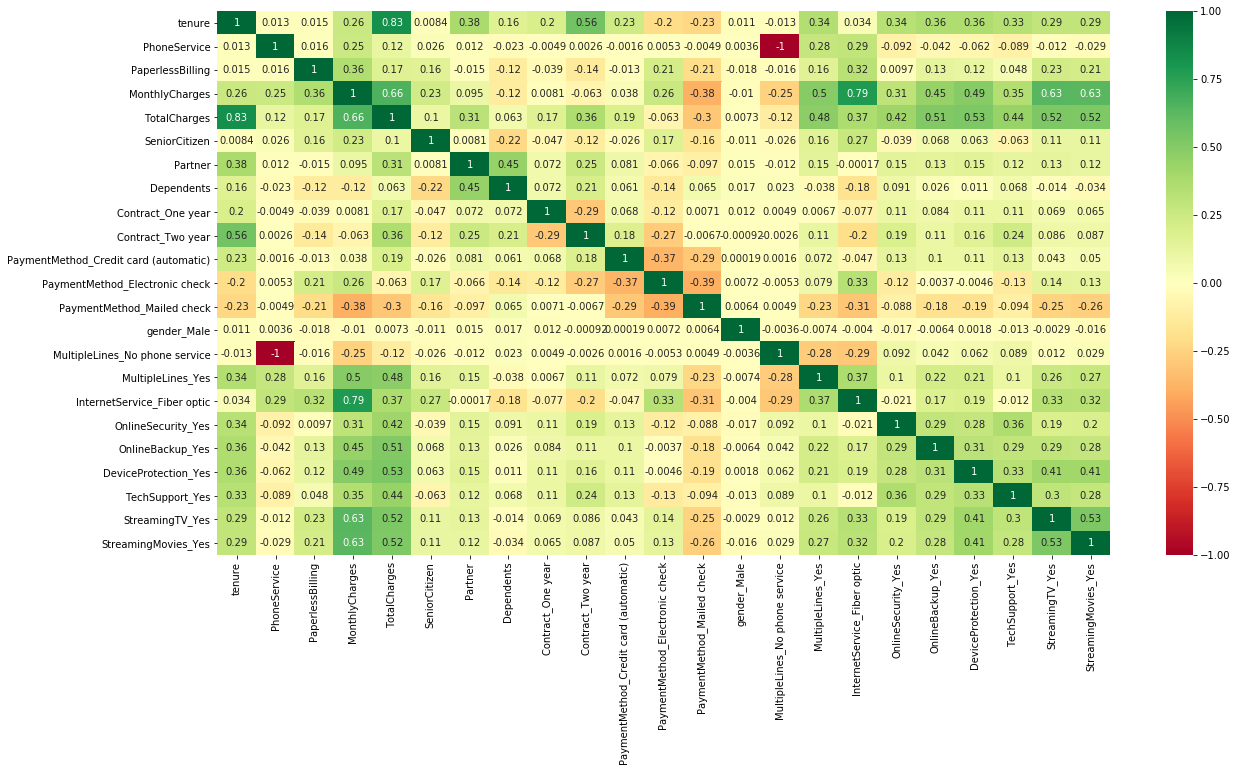

In [40]:
plt.figure(figsize = (20,10))
sns.heatmap(X_train.corr(),annot = True,cmap='RdYlGn')
plt.show()

## Building Model


**Using Statsmodels**

In [41]:
import statsmodels.api as sm

- first regression model using GLM(Generalized Linear Models)
- 'Binomial()' in the 'family' argument tells statsmodels that it needs to fit a logit curve to a binomial data.i.e o/p is 0/1

In [42]:
X_train_sm1 = sm.add_constant(X_train)
X_train_sm1.head()

,const,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes
1584,1.0,1.330585,0,1,-0.383857,0.534804,1,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,1,1
1043,1.0,-0.013956,1,1,0.155250,0.022199,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
1077,1.0,0.352737,1,1,1.639866,0.977112,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1
2478,1.0,-1.154780,1,0,-0.680780,-0.909757,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
6908,1.0,-0.951061,1,0,-0.322482,-0.809427,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0


In [43]:
log_m1 = sm.GLM(y_train,X_train_sm1,family=sm.families.Binomial())
log_m1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4899
Model Family:                Binomial   Df Model:                           22
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2040.3
Date:                Mon, 29 Jun 2020   Deviance:                       4080.7
Time:                        20:12:24   Pearson chi2:                 5.58e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.4115      0.195     -2.115      0.034      -0.793      -0.030
tenure                                   -1.5702      0.185     -8.500      0.000      -1.932      -1.208
PhoneService                             -0.8324      0.089     -9.335      0.000      -1.007      -0.658
PaperlessBilling                          0.2751      0.089      3.109      0.002       0.102       0.449
MonthlyCharges                            0.7785      0.195      3.990      0.000       0.396       1.161
TotalCharges                              0.8049      0.193      4.161      0.000       0.426       1.184
SeniorCitizen                             0.2144      0.100      2.143      0.032       0.018       0.410
Partner                                  -0.0255      0.092     -0.276      0.783      -0.206       0.156
Dependents                               -0.0526      0.107     -0.492      0.623      -0.262       0.157
Contract_One year                        -0.7172      0.128     -5.610      0.000      -0.968      -0.467
Contract_Two year                        -1.5698      0.215     -7.304      0.000      -1.991      -1.149
PaymentMethod_Credit card (automatic)    -0.0028      0.136     -0.020      0.984      -0.269       0.264
PaymentMethod_Electronic check            0.2917      0.114      2.568      0.010       0.069       0.514
PaymentMethod_Mailed check               -0.1711      0.138     -1.243      0.214      -0.441       0.099
gender_Male                               0.0224      0.077      0.289      0.772      -0.129       0.174
MultipleLines_No phone service            0.4210      0.162      2.605      0.009       0.104       0.738
MultipleLines_Yes                         0.2327      0.103      2.265      0.024       0.031       0.434
InternetService_Fiber optic               0.0524      0.226      0.232      0.817      -0.390       0.495
OnlineSecurity_Yes                       -0.4987      0.112     -4.468      0.000      -0.717      -0.280
OnlineBackup_Yes                         -0.3058      0.101     -3.022      0.003      -0.504      -0.107
DeviceProtection_Yes                     -0.2242      0.103     -2.177      0.030      -0.426      -0.022
TechSupport_Yes                          -0.4626      0.112     -4.115      0.000      -0.683      -0.242
StreamingTV_Yes                          -0.0077      0.120     -0.064      0.949      -0.244       0.228
StreamingMovies_Yes                       0.0231      0.120      0.193      0.847      -0.212       0.258
=========================================================================================================
"""

- in the above summary we need to note the coef and p-score
- coef show -ve and +ve corelation
- p-score if high (greater than 0.05),tells us that the feature is insignificant
- hence from the above model we figure that features **Partner,Dependents,PaymentMethod_Credit card (automatic),PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,StreamingTV_Yes,StreamingMovies_Yes** are insignificant features and can be dropped from the model for better accuracy.
- there is also an automated way to figureout insignificant features(RFE) which we will explore below

## Feature selection using RFE and model building

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [45]:
logreg = LogisticRegression()

In [46]:
rfe = RFE(logreg, n_features_to_select = 15)
rfe.fit(X_train,y_train)

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=100,
                                 multi_class='auto', n_jobs=None, penalty='l2',
                                 random_state=None, solver='lbfgs', tol=0.0001,
                                 verbose=0, warm_start=False),
    n_features_to_select=15, step=1, verbose=0)

In [47]:
rfe.support_

array([ True,  True,  True,  True,  True,  True, False, False,  True,
        True, False,  True, False, False,  True,  True, False,  True,
        True,  True,  True, False, False])

In [48]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('tenure', True, 1),
 ('PhoneService', True, 1),
 ('PaperlessBilling', True, 1),
 ('MonthlyCharges', True, 1),
 ('TotalCharges', True, 1),
 ('SeniorCitizen', True, 1),
 ('Partner', False, 6),
 ('Dependents', False, 3),
 ('Contract_One year', True, 1),
 ('Contract_Two year', True, 1),
 ('PaymentMethod_Credit card (automatic)', False, 9),
 ('PaymentMethod_Electronic check', True, 1),
 ('PaymentMethod_Mailed check', False, 2),
 ('gender_Male', False, 7),
 ('MultipleLines_No phone service', True, 1),
 ('MultipleLines_Yes', True, 1),
 ('InternetService_Fiber optic', False, 4),
 ('OnlineSecurity_Yes', True, 1),
 ('OnlineBackup_Yes', True, 1),
 ('DeviceProtection_Yes', True, 1),
 ('TechSupport_Yes', True, 1),
 ('StreamingTV_Yes', False, 8),
 ('StreamingMovies_Yes', False, 5)]

The above features with rfe support as False shows that it is insignificant

In [49]:
sig_cols = X_train.columns[rfe.support_]
sig_cols

Index(['tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'SeniorCitizen', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Electronic check',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes',
       'TechSupport_Yes'],
      dtype='object')

In [50]:
#rejected features
X_train.columns[~rfe.support_]

Index(['Partner', 'Dependents', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Mailed check', 'gender_Male',
       'InternetService_Fiber optic', 'StreamingTV_Yes',
       'StreamingMovies_Yes'],
      dtype='object')

We can see above that the 8 features rejected by the RFE are the same that we highlighted earlier manually
___
Now lets **build the statmodel** using significant features from RFE

In [51]:
X_train_sm2 = sm.add_constant(X_train[sig_cols])
X_train_sm2.head()

,const,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Contract_One year,Contract_Two year,PaymentMethod_Electronic check,MultipleLines_No phone service,MultipleLines_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes
1584,1.0,1.330585,0,1,-0.383857,0.534804,1,0,1,0,1,0,0,1,1,0
1043,1.0,-0.013956,1,1,0.155250,0.022199,0,0,0,0,0,0,0,0,0,0
1077,1.0,0.352737,1,1,1.639866,0.977112,0,0,0,0,0,1,1,1,1,1
2478,1.0,-1.154780,1,0,-0.680780,-0.909757,0,0,0,0,0,0,0,0,0,0
6908,1.0,-0.951061,1,0,-0.322482,-0.809427,0,0,0,1,0,0,0,0,0,0


In [52]:
log_m2 = sm.GLM(y_train, X_train_sm2, family=sm.families.Binomial())
res = log_m2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4907
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2041.7
Date:                Mon, 29 Jun 2020   Deviance:                       4083.3
Time:                        20:12:26   Pearson chi2:                 5.63e+03
No. Iterations:                    12                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -0.4269      0.095     -4.516      0.000      -0.612      -0.242
tenure                            -1.5447      0.180     -8.603      0.000      -1.897      -1.193
PhoneService                      -0.8512      0.068    -12.526      0.000      -0.984      -0.718
PaperlessBilling                   0.2812      0.088      3.185      0.001       0.108       0.454
MonthlyCharges                     0.8388      0.080     10.434      0.000       0.681       0.996
TotalCharges                       0.7875      0.188      4.197      0.000       0.420       1.155
SeniorCitizen                      0.2272      0.098      2.318      0.020       0.035       0.419
Contract_One year                 -0.7244      0.126     -5.747      0.000      -0.971      -0.477
Contract_Two year                 -1.5781      0.213     -7.400      0.000      -1.996      -1.160
PaymentMethod_Electronic check     0.3510      0.083      4.236      0.000       0.189       0.513
MultipleLines_No phone service     0.4243      0.109      3.883      0.000       0.210       0.639
MultipleLines_Yes                  0.2281      0.098      2.335      0.020       0.037       0.420
OnlineSecurity_Yes                -0.5115      0.100     -5.098      0.000      -0.708      -0.315
OnlineBackup_Yes                  -0.3155      0.093     -3.402      0.001      -0.497      -0.134
DeviceProtection_Yes              -0.2362      0.097     -2.443      0.015      -0.426      -0.047
TechSupport_Yes                   -0.4771      0.102     -4.699      0.000      -0.676      -0.278
==================================================================================================
"""

In [53]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm2)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.02711439, 0.30415035, 0.32980685, 0.31395226, 0.409544  ,
       0.46613687, 0.6907999 , 0.00498774, 0.32737495, 0.36557286])

In [54]:
# actual churn values
y_train.values

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [55]:
# cusID
y_train.index

Int64Index([1584, 1043, 1077, 2478, 6908, 3887, 3006, 4693, 6898, 1461,
            ...
            4232,  144, 5064, 2900, 2768,  907, 5200, 3987,  235, 5165],
           dtype='int64', length=4922)

**lets create a DataFrame which has churn vs pred Churn probability wrt CusID**

In [56]:
y_train_pred_final = pd.DataFrame({'CusID': y_train.index ,
                                  'Churn': y_train.values,
                                  'ChurnProb': y_train_pred})

y_train_pred_final

,CusID,Churn,ChurnProb
0,1584,0,0.027114
1,1043,1,0.304150
2,1077,1,0.329807
3,2478,0,0.313952
4,6908,1,0.409544
...,...,...,...
4917,907,0,0.115689
4918,5200,0,0.240198
4919,3987,1,0.677008
4920,235,1,0.444049


lets create a new column 'Predicted_Churn' wrt ChurnProb threshold @ 0.5

In [57]:
y_train_pred_final['Predicted_Churn'] = y_train_pred_final['ChurnProb'].map(lambda x: 1 if x>0.5 else 0)

y_train_pred_final

,CusID,Churn,ChurnProb,Predicted_Churn
0,1584,0,0.027114,0
1,1043,1,0.304150,0
2,1077,1,0.329807,0
3,2478,0,0.313952,0
4,6908,1,0.409544,0
...,...,...,...,...
4917,907,0,0.115689,0
4918,5200,0,0.240198,0
4919,3987,1,0.677008,1
4920,235,1,0.444049,0


In [58]:
from sklearn import metrics

In [59]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final['Churn'], y_train_pred_final['Predicted_Churn']))

0.806989028850061


In [60]:
#lets check confusion matrix

cm = metrics.confusion_matrix(y_train_pred_final['Churn'], y_train_pred_final['Predicted_Churn'])
cm

array([[3239,  369],
       [ 581,  733]], dtype=int64)

In [61]:
cm_df = pd.DataFrame(cm,
                     index=['0','1'],
                     columns=['Predicted 0','Predicted 1'])

cm_df

,Predicted 0,Predicted 1
0,3239,369
1,581,733


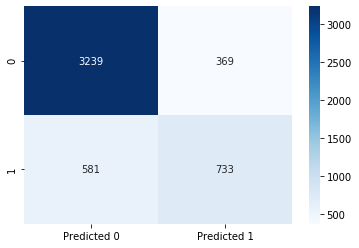

In [62]:
sns.heatmap(cm_df,annot=True,fmt='.5g',cmap='Blues')

In [63]:
cm[0,0], cm[0,1], cm[1,0], cm[1,1]

(3239, 369, 581, 733)

## Checking the VIF(Variance inflation factor)


note: to check the multicoliniarity among features

In [64]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [65]:
X_train[sig_cols].columns

Index(['tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'SeniorCitizen', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Electronic check',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes',
       'TechSupport_Yes'],
      dtype='object')

In [66]:
vif = pd.DataFrame()

vif['Features'] = X_train[sig_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[sig_cols].values, i) for i in range(X_train[sig_cols].shape[1])]
vif

,Features,VIF
0,tenure,7.071192
1,PhoneService,9.027934
2,PaperlessBilling,1.203525
3,MonthlyCharges,4.966598
4,TotalCharges,10.457710
5,SeniorCitizen,1.115461
6,Contract_One year,1.571786
7,Contract_Two year,2.465242
8,PaymentMethod_Electronic check,1.305446
9,MultipleLines_No phone service,2.471945


In [67]:
vif['VIF'] = round(vif['VIF'],2)
vif.sort_values(by='VIF', ascending=False, inplace=True)
vif

,Features,VIF
4,TotalCharges,10.46
1,PhoneService,9.03
0,tenure,7.07
3,MonthlyCharges,4.97
7,Contract_Two year,2.47
9,MultipleLines_No phone service,2.47
13,DeviceProtection_Yes,1.59
6,Contract_One year,1.57
10,MultipleLines_Yes,1.55
14,TechSupport_Yes,1.47


**The VIF of TotalCharges & PhoneService seem relatively high so lets drop them  from our model**

In [68]:
sig_cols = sig_cols.drop(['PhoneService','TotalCharges'])

In [69]:
sig_cols

Index(['tenure', 'PaperlessBilling', 'MonthlyCharges', 'SeniorCitizen',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Electronic check', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
       'DeviceProtection_Yes', 'TechSupport_Yes'],
      dtype='object')

**Lets build another statsmodel and check the impact on accuracy**

In [70]:
X_train_sm3 = sm.add_constant(X_train[sig_cols])
log_m3 = sm.GLM(y_train,X_train_sm3,family=sm.families.Binomial())
res2 = log_m3.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4908
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2050.9
Date:                Mon, 29 Jun 2020   Deviance:                       4101.7
Time:                        20:12:28   Pearson chi2:                 5.01e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -1.2053      0.120    -10.031      0.000      -1.441      -0.970
tenure                            -0.8640      0.067    -12.986      0.000      -0.994      -0.734
PaperlessBilling                   0.2730      0.088      3.102      0.002       0.101       0.445
MonthlyCharges                     1.0074      0.071     14.230      0.000       0.869       1.146
SeniorCitizen                      0.2331      0.098      2.368      0.018       0.040       0.426
Contract_One year                 -0.7102      0.125     -5.697      0.000      -0.955      -0.466
Contract_Two year                 -1.5192      0.210     -7.242      0.000      -1.930      -1.108
PaymentMethod_Electronic check     0.3378      0.083      4.076      0.000       0.175       0.500
MultipleLines_No phone service     1.2119      0.151      8.039      0.000       0.916       1.507
MultipleLines_Yes                  0.2515      0.097      2.593      0.010       0.061       0.442
OnlineSecurity_Yes                -0.5096      0.100     -5.097      0.000      -0.705      -0.314
OnlineBackup_Yes                  -0.2864      0.092     -3.110      0.002      -0.467      -0.106
DeviceProtection_Yes              -0.2057      0.096     -2.139      0.032      -0.394      -0.017
TechSupport_Yes                   -0.4660      0.101     -4.609      0.000      -0.664      -0.268
==================================================================================================
"""

In [71]:
y_train_pred = res2.predict(X_train_sm3).values.reshape(-1)

In [72]:
y_train_pred_final['ChurnProb'] = y_train_pred

In [73]:
y_train_pred_final['Predicted_Churn'] = y_train_pred_final['ChurnProb'].map(lambda x: 1 if x>0.5 else 0)

In [74]:
metrics.accuracy_score(y_train_pred_final['Churn'],y_train_pred_final['Predicted_Churn'])

0.8039414872003251

In [75]:
cm_1 = metrics.confusion_matrix(y_train_pred_final['Churn'], y_train_pred_final['Predicted_Churn'])

([<matplotlib.axis.XTick at 0x176b7f3dbc8>,
 <a list of 2 Text xticklabel objects>)

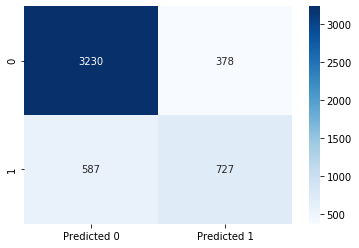

In [76]:
sns.heatmap(cm_1,
           annot=True,fmt='.5g',cmap='Blues')
plt.xticks(np.arange(0.5,2),['Predicted 0','Predicted 1'])

## Metrics beyond accuracy
**TN FP<br>FN TP**

- **Recall / Sensitivity / TP rate** ==  **TP / TP+FN**
- **Specificity / TN rate** == **TN / TN+FP**
- **FP rate** == **FP / FP+TN**
- **Positive predictive value** == **TP / TP+FP**
- **Negative predictive value** == **TN / TN+FN**

In [77]:
TN, FP, FN, TP =  cm_1[0,0], cm_1[0,1], cm_1[1,0], cm_1[1,1]

In [78]:
TN, FP, FN, TP

(3230, 378, 587, 727)

In [79]:
#Recall/Sensitivity/TPR

TPR = TP/(TP+FN)
print('TP rate=',round(TPR*100,2),'%')

TP rate= 55.33 %


In [80]:
# Specificity / TNR

TNR = TN / (TN+FP)
print('TN rate=',round(TNR*100,2),'%')

TN rate= 89.52 %


In [81]:
# FP rate(1-Specificity)

FPR = FP / (FP+TN)
print('FP rate=',round(FPR*100,2),'%')

FP rate= 10.48 %


In [82]:
#PPV

PPV = TP / (TP+FP)
print('PPV=',round(PPV*100,2),'%')

PPV= 65.79 %


In [83]:
#NPV

NPV = TN / (TN+FN)
print('PPV=',round(NPV*100,2),'%')

PPV= 84.62 %


## Plotting ROC curve

**An ROC curve demonstrates several things:**

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [84]:
# Defining the function to plot the ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

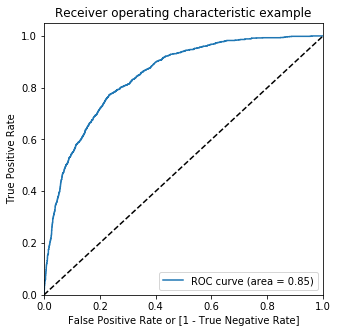

In [85]:

# Calling the function
draw_roc(y_train_pred_final['Churn'], y_train_pred_final['ChurnProb'])

In [86]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.ChurnProb, drop_intermediate = False )

In [87]:
fpr, tpr, thresholds

(array([0.        , 0.        , 0.        , ..., 0.99916851, 0.99972284,
        1.        ]),
 array([0.00000000e+00, 7.61035008e-04, 1.52207002e-03, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00]),
 array([1.88048833, 0.88048833, 0.8788806 , ..., 0.00355136, 0.00351605,
        0.00350436]))

In [88]:
[float(i)/10 for i in range(10)]

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [89]:
y_train_pred_final

,CusID,Churn,ChurnProb,Predicted_Churn
0,1584,0,0.045873,0
1,1043,1,0.317818,0
2,1077,1,0.309778,0
3,2478,0,0.290416,0
4,6908,1,0.408390,0
...,...,...,...,...
4917,907,0,0.128325,0
4918,5200,0,0.184488,0
4919,3987,1,0.687898,1
4920,235,1,0.436433,0


In [90]:
thresholds = [float(i)/10 for i in range(10)]
thresholds

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [91]:
# Let's create columns with different probability cutoffs
for i in thresholds:
    y_train_pred_final[i] = y_train_pred_final['ChurnProb'].map(lambda x : 1 if x > i else 0)
y_train_pred_final.head()

,CusID,Churn,ChurnProb,Predicted_Churn,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1584,0,0.045873,0,1,0,0,0,0,0,0,0,0,0
1,1043,1,0.317818,0,1,1,1,1,0,0,0,0,0,0
2,1077,1,0.309778,0,1,1,1,1,0,0,0,0,0,0
3,2478,0,0.290416,0,1,1,1,0,0,0,0,0,0,0
4,6908,1,0.408390,0,1,1,1,1,1,0,0,0,0,0


In [92]:
cutoff_df = pd.DataFrame(columns=['prob','accuracy','sensitivity','specificity','precision'])
cutoff_df

,prob,accuracy,sensitivity,specificity,precision


In [93]:
for i in thresholds:
    cm_2 = metrics.confusion_matrix(y_train_pred_final['Churn'],y_train_pred_final[i])
    total = cm_2.sum()
    
    accuracy = (cm_2[0,0] + cm_2[1,1]) / total
    sensitivity = cm_2[1,1] / (cm_2[1,1]+cm_2[1,0])
    specificity = cm_2[0,0] / (cm_2[0,0]+cm_2[0,1])
    precision = cm_2[1,1] / (cm_2[1,1] + cm_2[0,1])
    cutoff_df.loc[i] = [ i, accuracy, sensitivity, specificity,precision]

cutoff_df

,prob,accuracy,sensitivity,specificity,precision
0.0,0.0,0.266965,1.000000,0.000000,0.266965
0.1,0.1,0.607273,0.945205,0.484202,0.400258
0.2,0.2,0.707436,0.854642,0.653825,0.473440
0.3,0.3,0.768793,0.770928,0.768016,0.547568
0.4,0.4,0.791548,0.655251,0.841186,0.600418
0.5,0.5,0.803941,0.553272,0.895233,0.657919
0.6,0.6,0.798862,0.394977,0.945953,0.726891
0.7,0.7,0.771434,0.202435,0.978659,0.775510
0.8,0.8,0.742787,0.043379,0.997506,0.863636
0.9,0.9,0.733035,0.000000,1.000000,NaN


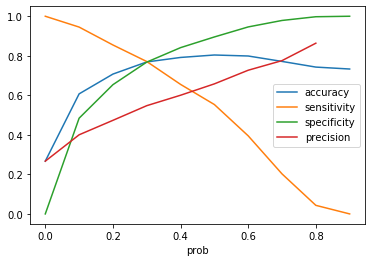

In [94]:
cutoff_df.plot.line(x='prob', y =['accuracy', 'sensitivity', 'specificity','precision']);

In [95]:
y_train_pred_final['pred_0.3'] = y_train_pred_final['ChurnProb'].map(lambda x : 1 if x>0.3 else 0)
y_train_pred_final['pred_0.42'] = y_train_pred_final['ChurnProb'].map(lambda x : 1 if x>0.42 else 0)

In [96]:
y_train_pred_final

,CusID,Churn,ChurnProb,Predicted_Churn,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,pred_0.3,pred_0.42
0,1584,0,0.045873,0,1,0,0,0,0,0,0,0,0,0,0,0
1,1043,1,0.317818,0,1,1,1,1,0,0,0,0,0,0,1,0
2,1077,1,0.309778,0,1,1,1,1,0,0,0,0,0,0,1,0
3,2478,0,0.290416,0,1,1,1,0,0,0,0,0,0,0,0,0
4,6908,1,0.408390,0,1,1,1,1,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4917,907,0,0.128325,0,1,1,0,0,0,0,0,0,0,0,0,0
4918,5200,0,0.184488,0,1,1,0,0,0,0,0,0,0,0,0,0
4919,3987,1,0.687898,1,1,1,1,1,1,1,1,0,0,0,1,1
4920,235,1,0.436433,0,1,1,1,1,1,0,0,0,0,0,1,1


In [97]:
cm_03 = metrics.confusion_matrix(y_train_pred_final['Churn'],y_train_pred_final['pred_0.3'])
cm_03

array([[2771,  837],
       [ 301, 1013]], dtype=int64)

In [98]:
cm_042 = metrics.confusion_matrix(y_train_pred_final['Churn'],y_train_pred_final['pred_0.42'])
cm_042

array([[3073,  535],
       [ 478,  836]], dtype=int64)

# Applying model to test set

In [99]:
X_test[['tenure','MonthlyCharges','TotalCharges']] = scaler.transform(X_test[['tenure','MonthlyCharges','TotalCharges']])

In [100]:
X_test[sig_cols]

,tenure,PaperlessBilling,MonthlyCharges,SeniorCitizen,Contract_One year,Contract_Two year,PaymentMethod_Electronic check,MultipleLines_No phone service,MultipleLines_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes
1778,1.615791,0,-1.337661,0,0,1,0,0,1,0,0,0,0
5036,-0.665855,1,0.672792,1,0,0,0,0,1,0,0,0,0
1106,1.249098,0,1.074219,0,0,1,0,0,1,0,1,0,0
1665,-0.951061,1,0.390798,0,0,0,1,0,1,0,0,0,0
927,-0.788087,1,0.533454,0,0,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2053,0.597199,1,0.606441,0,0,0,0,0,1,0,1,1,0
6217,1.208354,1,0.543407,0,1,0,0,0,0,1,1,0,0
5222,-0.991805,1,0.014253,0,0,0,0,0,1,1,1,1,0
5868,-1.277011,1,-0.699027,0,0,0,0,0,0,0,0,0,0


In [101]:
X_test_sm = sm.add_constant(X_test[sig_cols])
X_test_sm.head()

,const,tenure,PaperlessBilling,MonthlyCharges,SeniorCitizen,Contract_One year,Contract_Two year,PaymentMethod_Electronic check,MultipleLines_No phone service,MultipleLines_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes
1778,1.0,1.615791,0,-1.337661,0,0,1,0,0,1,0,0,0,0
5036,1.0,-0.665855,1,0.672792,1,0,0,0,0,1,0,0,0,0
1106,1.0,1.249098,0,1.074219,0,0,1,0,0,1,0,1,0,0
1665,1.0,-0.951061,1,0.390798,0,0,0,1,0,1,0,0,0,0
927,1.0,-0.788087,1,0.533454,0,0,0,1,0,0,0,1,1,0


In [102]:
y_test_pred = res2.predict(X_test_sm)
y_test_pred

1778    0.005396
5036    0.691122
1106    0.059730
1665    0.705248
927     0.532896
          ...   
2053    0.253907
6217    0.050451
5222    0.307649
5868    0.369779
4398    0.012319
Length: 2110, dtype: float64

In [103]:
y_test_pred = y_test_pred.values.reshape(-1)
y_test_pred

array([0.00539648, 0.69112152, 0.05972988, ..., 0.30764896, 0.36977856,
       0.01231943])

In [104]:
y_test_pred_final = pd.DataFrame({'CusID':y_test.index,
                                 'Churn':y_test.values,
                                 'ChurnProb':y_test_pred})
y_test_pred_final

,CusID,Churn,ChurnProb
0,1778,0,0.005396
1,5036,1,0.691122
2,1106,0,0.059730
3,1665,0,0.705248
4,927,1,0.532896
...,...,...,...
2105,2053,1,0.253907
2106,6217,0,0.050451
2107,5222,0,0.307649
2108,5868,0,0.369779


**Lets predict the outcomes by keepint the threshold at 0.3**

In [105]:
y_test_pred_final['Pred_Churn'] = y_test_pred_final['ChurnProb'].map(lambda x: 1 if x>0.3 else 0)
y_test_pred_final

,CusID,Churn,ChurnProb,Pred_Churn
0,1778,0,0.005396,0
1,5036,1,0.691122,1
2,1106,0,0.059730,0
3,1665,0,0.705248,1
4,927,1,0.532896,1
...,...,...,...,...
2105,2053,1,0.253907,0
2106,6217,0,0.050451,0
2107,5222,0,0.307649,1
2108,5868,0,0.369779,1


In [106]:
metrics.accuracy_score(y_test_pred_final['Churn'],y_test_pred_final['Pred_Churn'])

0.761611374407583

In [107]:
cm_test = metrics.confusion_matrix(y_test_pred_final['Churn'],y_test_pred_final['Pred_Churn'])
cm_test

array([[1179,  376],
       [ 127,  428]], dtype=int64)

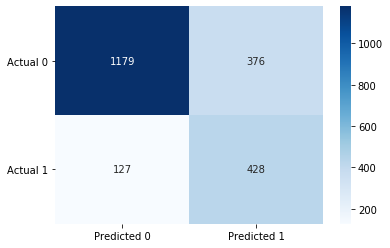

In [108]:
sns.heatmap(cm_test,annot=True,cmap='Blues',fmt='.5g')
plt.xticks(np.arange(0.5,2),['Predicted 0','Predicted 1'])
plt.yticks(np.arange(0.5,2),['Actual 0','Actual 1'],rotation=0);

### CM metrics evaluation:

In [109]:
from sklearn.metrics import precision_score,recall_score

In [110]:
TN,FP,FN,TP = cm_test[0,0],cm_test[0,1],cm_test[1,0],cm_test[1,1]
TN,FP,FN,TP

(1179, 376, 127, 428)

In [111]:
# Accuracy

acc = (TN+TP) / (TN+TP+FP+FN)
print('Accuracy =',round(acc*100,2),'%')

Accuracy = 76.16 %


In [112]:
# Recall/TPR/Sensitivity

tpr = TP / (TP+FN)
print('Recall/TPR/Sensitivity =',round(tpr*100,2),'%')

Recall/TPR/Sensitivity = 77.12 %


In [113]:
#Specificity/TNR

tnr = TN / (TN+FP)
print('Specificity/TNR =',round(tnr*100,2),'%')

Specificity/TNR = 75.82 %


In [114]:
# FPR (1-specificity)

fpr = FP / (FP+TN)
print('FPR =',round(fpr*100,2),'%')

FPR = 24.18 %


In [115]:
#Precision

prec = TP / (TP+FP)
print('Precision =',round(prec*100,2),'%')

Precision = 53.23 %


## From the evaluation of above metric scores we can conclude that we have built a decent model for predicting Churn Customers.